<a href="https://colab.research.google.com/github/KayalvizhiT513/Gradient_Descent_Comparison/blob/main/SGD_with_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exponentially Weighted Averages** is used in sequential noisy data to reduce the noise and smoothen the data. To denoise the data, we can use the following equation to generate a new sequence of data with less noise.
![link text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*RFd9_0MdWli6zInCrNu0IA.png)

Now, let’s see how the new sequence is generated using the above equation: For our example to make it simple, let’s consider a sequence of size 3.

![link text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*oDSCizfdu0uUj2AtOEbKEw.png)

Let’s expand V3 equation:

![link text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*Nfg7cIutvIiJPJkF23lfGg.png)

# 1. SGD with momentum
It always works better than the normal Stochastic Gradient Descent Algorithm. The problem with SGD is that while it tries to reach minima because of the high oscillation we can’t increase the learning rate. So it takes time to converge. In this algorithm, we will be using Exponentially Weighted Averages to compute Gradient and used this Gradient to update parameter.


*   An equation to update weights and bias in SGD

![link text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*2l_DnUmIaLC-WPMBvWLoEw.png)

*   An equation to update weights and bias in SGD with momentum
![link text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*OWwKUnci57wc3MjpCh2P0Q.png)

In SGD with momentum, we have added momentum in a gradient function. By this I mean the present Gradient is dependent on its previous Gradient and so on. This accelerates SGD to converge faster and reduce the oscillation.
![link text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*IKSRsulGaDzrPuiTAuE2YQ.png)

The above picture shows how the convergence happens in SGD with momentum vs SGD without momentum.

In [ ]:
import numpy as np
import csv

# Step 1: Initialize weights and learning rate
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.01

# Step 2: Load data from CSV file
data = np.genfromtxt('randXY.csv', delimiter=',', skip_header=1)  # Adjust the filename accordingly

# Extract X and Y from the loaded data
X = data[:, 0]  # Assuming the first column is X
Y = data[:, 1]  # Assuming the second column is Y

print("Initial w0: ", w_0, "\n Initial w1: ", w_1)

Initial w0:  0.8260560647266798 
 Initial w1:  0.5782539087214469


In [ ]:
def percentage_difference(value1, value2):
    return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100

In [ ]:
import matplotlib.pyplot as plt

# Function to plot epoch vs. loss
def plot_loss_vs_epoch(loss_history, algorithm_name):
    plt.plot(range(len(loss_history)), loss_history, label=algorithm_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{algorithm_name} - Epoch vs. Loss')
    plt.legend()
    plt.show()

In [ ]:
def update_w_with_momentum(w, learning_rate, prev_gradient_w, gradient_w, beta = 0.9):
    # Update velocity
    velocity = (beta * prev_gradient_w) + ((1 - beta) * gradient_w)

    # Update w0
    w = w - (learning_rate * velocity)

    return w, velocity

In [ ]:
# Step 3: Define SGD function
def sgd_one_sample(X, Y, w0, w1, learning_rate, epochs=6000, tol=1, consecutive_instances=10):
    n = len(X)
    prev_loss = float('inf')
    count = 0

    # Initialize previous gradients
    prev_gradient_w0 = 0.0
    prev_gradient_w1 = 0.0

    for epoch in range(epochs):
        for i in range(n):
            # Select one random data point
            random_index = np.random.randint(0, n)
            x_i = X[random_index]
            y_i = Y[random_index]

            # Calculate prediction and loss for the selected point
            prediction = w0 + w1 * x_i
            loss = (y_i - prediction)**2

            # Calculate gradients
            gradient_w0 = -2 * (y_i - prediction)
            gradient_w1 = -2 * (y_i - prediction) * x_i

            # Update weights
            w0, gradient_w0 = update_w_with_momentum(w0, learning_rate, prev_gradient_w0, gradient_w0)
            w1, gradient_w1 = update_w_with_momentum(w1, learning_rate, prev_gradient_w1, gradient_w1)

            # Update previous gradient for next iteration
            prev_gradient_w0 = gradient_w0
            prev_gradient_w1 = gradient_w1

        # Calculate overall loss for monitoring
        predictions = w0 + w1 * X
        overall_loss = np.mean((Y - predictions)**2)

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ")
            break

        # Append loss to the history
        loss_history_sgd_one_sample.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1

# Step 4: Run SGD with one training sample at a time
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.01
loss_history_sgd_one_sample = []
w0_sgd_one_sample, w1_sgd_one_sample = sgd_one_sample(X, Y, w_0, w_1, learning_rate)
print(f"Final weights for SGD with one sample: w0={w0_sgd_one_sample}, w1={w1_sgd_one_sample}")

Epoch 0, Loss: 0.04132899486033918
Epoch 24, Loss: 0.02111865111442244
Converged! 
Final weights for SGD with one sample: w0=4.747012413411985, w1=4.982396636503373


<ipython-input-35-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


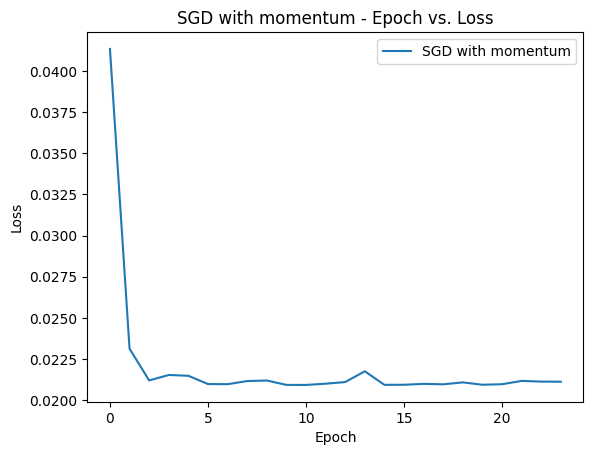

In [ ]:
# Plot the loss vs. epoch graph for SGD with one sample
plot_loss_vs_epoch(loss_history_sgd_one_sample, 'SGD with momentum')